# Milestone Project 3: Time Series forecasting in TensorFlow(BitPredict)

In [ ]:
import numpy as np

In [ ]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2025-04-17 07:55:57--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.009s  

2025-04-17 07:55:57 (19.3 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd
df=pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
               parse_dates=['Date'],
               index_col=['Date'])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.dtypes

,0
Currency,object
Closing Price (USD),float64
24h Open (USD),float64
24h High (USD),float64
24h Low (USD),float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

In [ ]:
bitcoin_prices=pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)':'Price'})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


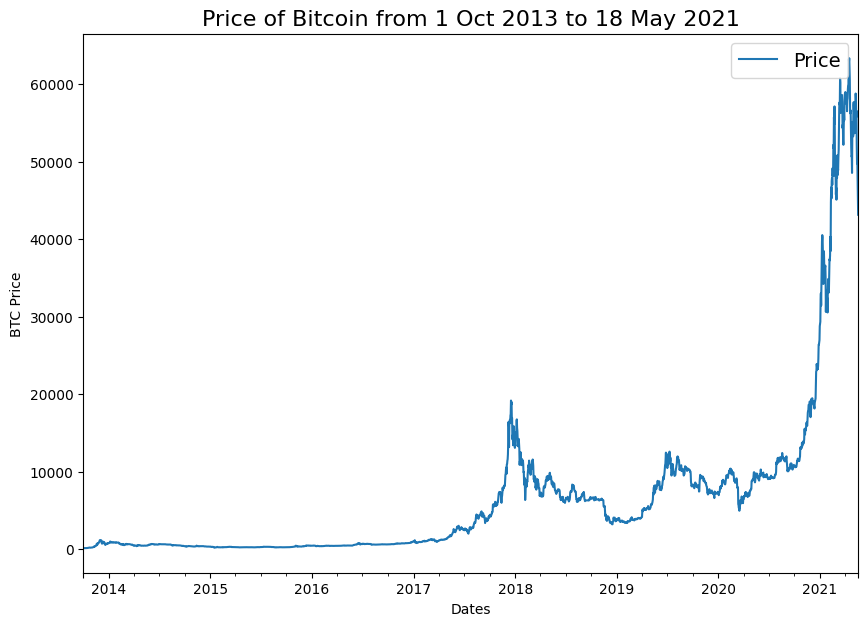

In [ ]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10,7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021',fontsize=16)
plt.xlabel('Dates')
plt.legend(fontsize=14);

In [ ]:
import csv
from datetime import datetime
timesteps=[]
btc_price=[]
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv','r') as f:
  csv_reader=csv.reader(f,delimiter=',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],'%Y-%m-%d'))
    btc_price.append(float(line[2]))

timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [ ]:
timesteps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices["Price"].to_numpy()

timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(timesteps,prices,test_size=0.2,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

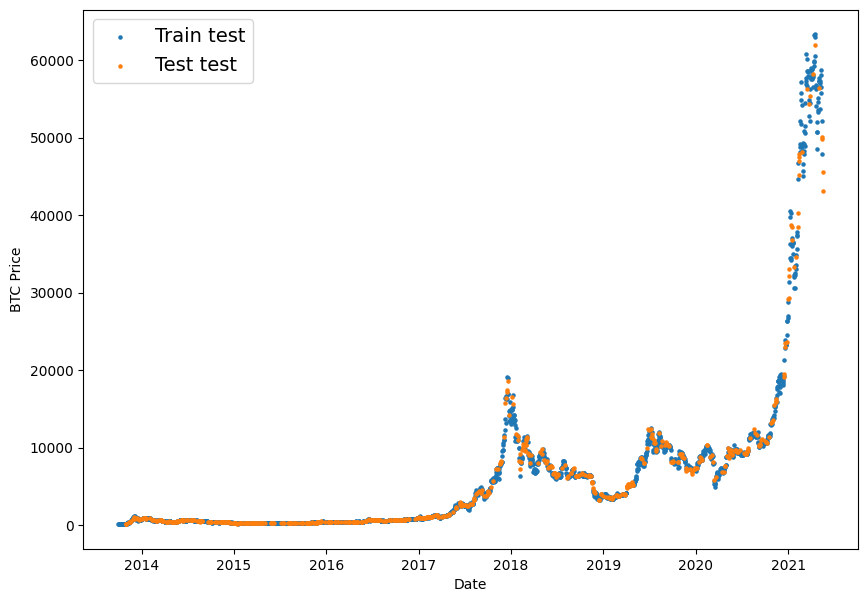

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label='Train test')
plt.scatter(X_test,y_test,s=5,label='Test test')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)

#Correct way

In [ ]:
split_size=int(0.8*len(prices))

X_train,y_train=timesteps[:split_size],prices[:split_size]

X_test,y_test=timesteps[split_size:],prices[split_size:]

len(X_train),len(y_train),len(X_test),len(y_test)

(2229, 2229, 558, 558)

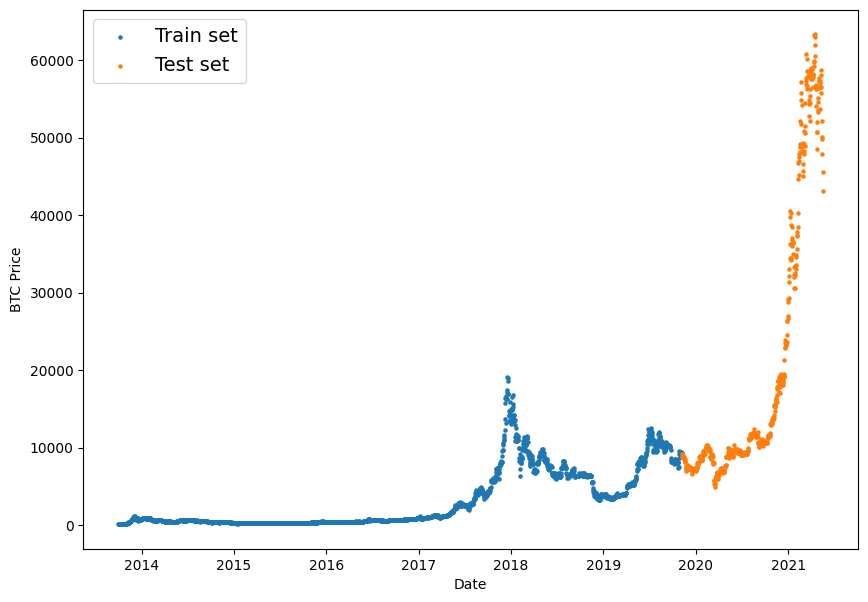

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label='Train set')
plt.scatter(X_test,y_test,s=5,label='Test set')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)

In [ ]:
def plot_time_series(timesteps,values,format='.',start=0,end=None,label=None):
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

#Naive Bayes Model

In [ ]:
naive_forecast=y_test[:-1]
naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

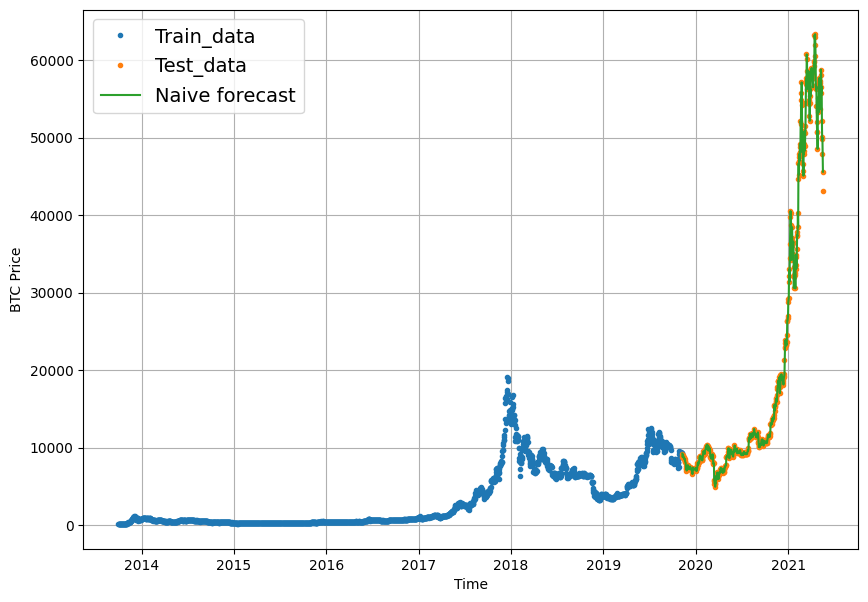

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label='Train_data')
plot_time_series(timesteps=X_test,values=y_test,label='Test_data')
plot_time_series(timesteps=X_test[1:],values=naive_forecast,format='-',label='Naive forecast')

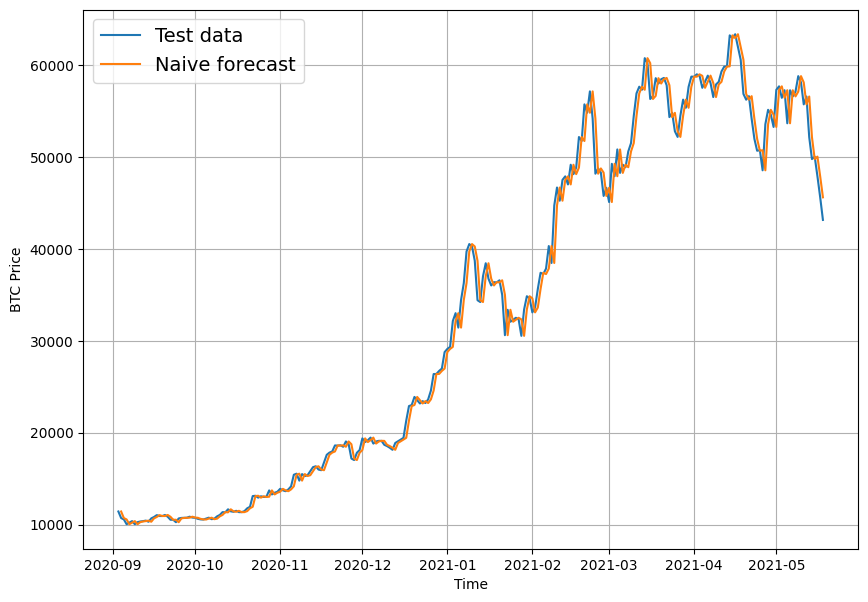

In [ ]:
plt.figure(figsize=(10,7))
offset=300
plot_time_series(timesteps=X_test,values=y_test,start=offset,format='-',label='Test data')
plot_time_series(timesteps=X_test[1:],values=naive_forecast,format='-',start=offset,label='Naive forecast')

In [ ]:
import tensorflow as tf

In [ ]:
def mean_absolute_scaled_error(y_true,y_pred):
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true,y_pred):
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_pred=tf.cast(y_pred,dtype=tf.float32)

  mae=tf.keras.metrics.MeanAbsoluteError()
  mae.update_state(y_true,y_pred)
  mse = tf.keras.metrics.MeanSquaredError()
  mse.update_state(y_true, y_pred)
  mse_result = mse.result().numpy()
  rmse=tf.math.sqrt(mse_result)
  mape=tf.keras.metrics.MeanAbsolutePercentageError()
  mape.update_state(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)

  return {'mae': mae.result().numpy(),
          'mse' :mse_result,
          'rmse' :rmse.numpy(),
          'mape' :mape.result().numpy(),
          'mase' :mase.numpy()}

In [ ]:
naive_results=evaluate_preds(y_true=y_test[1:],
                             y_pred=naive_forecast)
naive_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362),
 'mape': np.float32(2.5165248),
 'mase': np.float32(0.99957)}

In [ ]:
mean=tf.reduce_mean(y_test).numpy()

In [ ]:
# st_dev=tf.reduce_std(y_test).numpy()

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
def get_labelled_windows(x,horizon=1):

  return x[:,:-horizon],x[:, -horizon:]

In [ ]:
test_window,test_label=get_labelled_windows(tf.expand_dims(tf.range(8)+1,axis=0),horizon=HORIZON)
print(f'Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}')

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
def make_windows(x,window_size=7,horizon=1):

  window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)
  window_indexes=window_step + np.expand_dims(np.arange(len(x)-(window_size + horizon-1)),axis=0).T
  windowed_array=x[window_indexes]
  windows,labels=get_labelled_windows(windowed_array,horizon=horizon)
  return windows,labels

In [ ]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2780, 2780)

In [ ]:
for i in range(3):
  print(f'Winodw: {full_windows[i]} -> Label: {full_labels[i]}')

Winodw: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Winodw: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Winodw: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
for i in range(3):
  print(f'Winodw: {full_windows[i-3]} -> Label: {full_labels[i-3]}')

Winodw: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Winodw: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Winodw: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [ ]:
def make_train_test_splits(windows,labels,test_split=0.2):

  split_size-int(len(windows) *(1-test_split))
  train_windows=windows[:split_size]
  train_labels=labels[:split_size]
  test_windows=windows[split_size:]
  test_labels=labels[split_size:]
  return train_windows,train_labels,test_windows,test_labels

In [ ]:
train_windows,train_labels,test_windows,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2229, 551, 2229, 551)

In [ ]:
train_windows[:5],train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
import os

def create_model_checkpoint(model_name,save_path='model_experiments'):
  model_name = model_name if model_name.endswith(".keras") else model_name + ".keras"
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            verbose=0,save_best_only=True)

#Model 1:Dense Model(window=7,horizon=1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(HORIZON)
])

In [ ]:
model_1.compile(loss='mean_absolute_error',
                optimizer='adam',
                metrics=['mean_absolute_error'])

In [ ]:
model_1_history=model_1.fit(x=train_windows,
                            y=train_labels,epochs=100,
                            verbose=1,batch_size=128,
                            validation_data=(test_windows,test_labels),
                            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1809.8793 - mean_absolute_error: 1809.8793 - val_loss: 5345.8071 - val_mean_absolute_error: 5345.8071
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 621.3142 - mean_absolute_error: 621.3142 - val_loss: 2787.8333 - val_mean_absolute_error: 2787.8333
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 360.2260 - mean_absolute_error: 360.2260 - val_loss: 1590.0829 - val_mean_absolute_error: 1590.0829
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 295.1176 - mean_absolute_error: 295.1176 - val_loss: 1799.0338 - val_mean_absolute_error: 1799.0338
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 266.2746 - mean_absolute_error: 266.2746 - val_loss: 1271.9980 - val_mean_absolute_error: 1271.9980
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 213.7220 - mean_absolute_error: 213.7220 - val_loss: 1215.8978 - val_mean_absolute_error: 1215.8978
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8

In [ ]:
model_1.evaluate(test_windows,test_labels)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 335.9460 - mean_absolute_error: 335.9460 


[653.0955200195312, 653.0955200195312]

In [ ]:
model_1=tf.keras.models.load_model('/content/model_experiments/sequential_5.keras')
model_1.evaluate(test_windows,test_labels)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 328.6875 - mean_absolute_error: 328.6875


[641.422119140625, 641.422119140625]

In [ ]:
def make_preds(model,input_data):
  forecast=model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds=make_preds(model_1,test_windows)
len(model_1_preds),model_1_preds[:10]

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


(528,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([7465.4517, 7525.768 , 7547.501 , 7399.206 , 7241.1587, 7192.3955,
        7226.8115, 7279.88  , 7177.42  , 7180.4346], dtype=float32)>)

In [ ]:
model_1_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_1_preds)

model_1_results

{'mae': np.float32(641.4221),
 'mse': np.float32(1376552.1),
 'rmse': np.float32(1173.2656),
 'mape': np.float32(2.853347),
 'mase': np.float32(1.0856563)}

#Model 2

In [ ]:
WINDOW_SIZE=30
HORIZON=1

In [ ]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2757, 2757)

In [ ]:
train_windows,train_labels,test_windows,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2229, 528, 2229, 528)

In [ ]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(HORIZON)
])

In [ ]:
model_2.compile(loss='mean_absolute_error',
                optimizer='adam',
                metrics=['mean_absolute_error'])

In [ ]:
model_2_history=model_2.fit(x=train_windows,
                            y=train_labels,
                            epochs=100,verbose=1,
                            batch_size=128,
                            validation_data=(test_windows,test_labels),
                            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 3988.7688 - mean_absolute_error: 3988.7688 - val_loss: 4402.9102 - val_mean_absolute_error: 4402.9102
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 682.8771 - mean_absolute_error: 682.8771 - val_loss: 2459.0664 - val_mean_absolute_error: 2459.0664
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 482.6936 - mean_absolute_error: 482.6936 - val_loss: 2009.5509 - val_mean_absolute_error: 2009.5509
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 356.1452 - mean_absolute_error: 356.1452 - val_loss: 2093.3201 - val_mean_absolute_error: 2093.3201
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 363.6790 - mean_absolute_error: 363.6790 - val_loss: 1844.8811 - val_mean_absolute_error: 1844.8811
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 302.6078 - mean_absolute_error: 302.6078 - val_loss: 2178.5938 - val_mean_absolute_error: 2178.5938
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9

In [ ]:
model_2.evaluate(test_windows,test_labels)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 316.6039 - mean_absolute_error: 316.6039 


[626.3743286132812, 626.3743286132812]

In [ ]:
model_2=tf.keras.models.load_model('/content/model_experiments/sequential_6.keras')
model_2.evaluate(test_windows,test_labels)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 316.6039 - mean_absolute_error: 316.6039  


[626.3743286132812, 626.3743286132812]

In [ ]:
model_2_preds=make_preds(model_2,input_data=test_windows)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
model_2_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                              y_pred=model_2_preds)
model_2_results

{'mae': np.float32(626.3743),
 'mse': np.float32(1365855.4),
 'rmse': np.float32(1168.6981),
 'mape': np.float32(2.7437494),
 'mase': np.float32(1.0601867)}

# Model 3